### Importy

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.stats import linregress

# Fraktale samopodobne

## Trójkąt Sierpińskiego

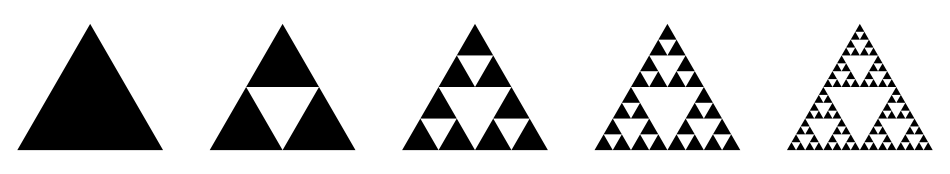

In [2]:
def sierpinski_triangle(points, n):
    if n == 0:
        return [points]

    # Wyznacz punkty podziału
    mid1 = ((points[0][0] + points[1][0]) / 2, (points[0][1] + points[1][1]) / 2)
    mid2 = ((points[1][0] + points[2][0]) / 2, (points[1][1] + points[2][1]) / 2)
    mid3 = ((points[0][0] + points[2][0]) / 2, (points[0][1] + points[2][1]) / 2)
    
    # Podziel trójkąt na 3 mniejsze
    triangles = []
    triangles.extend(sierpinski_triangle([points[0], mid1, mid3], n-1))
    triangles.extend(sierpinski_triangle([points[1], mid1, mid2], n-1))
    triangles.extend(sierpinski_triangle([points[2], mid2, mid3], n-1))

    return triangles

def draw_sierpinski(n):
    fig, axs = plt.subplots(1, n, figsize=(12, 2))
    for i, ax in enumerate(axs):
        triangles = sierpinski_triangle([(0, 0), (1, 0), (0.5, np.sqrt(3)/2)], i)
        for triangle in triangles:
            triangle = np.array(triangle)
            ax.fill(triangle[:, 0], triangle[:, 1], 'black')
        ax.axis('equal')
        ax.axis('off')


draw_sierpinski(5)

## Dywan Sierpińskiego

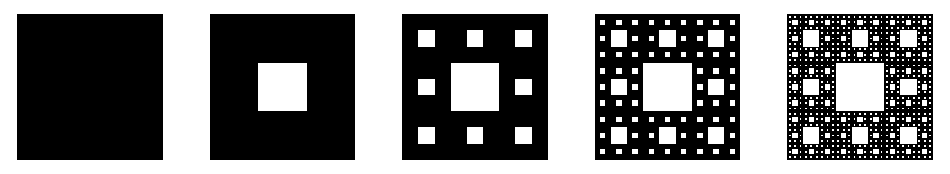

In [3]:
def sierpinski_carpet(points, n, s=3):
    if n == 0:
        return [points]
    
    rectangles = []
    
    y_h = (points[2][1] - points[1][1]) / s
    x_h = (points[1][0] - points[0][0]) / s

    for i in range(s):
        for j in range(s):
            if i != int(s / 2) or j != int(s/2):
               rectangles.extend(sierpinski_carpet([(points[0][0] + i * x_h, points[0][1] + j * y_h), (points[0][0] + (i + 1) * x_h, points[0][1] + j * y_h), (points[0][0] + (i + 1) * x_h, points[0][1] + (j + 1) * y_h), (points[0][0] + i * x_h, points[0][1] + (j + 1) * y_h)], n-1))

    return rectangles

def draw_sierpinski(n):
    fig, axs = plt.subplots(1, n, figsize=(12, 2))
    for i, ax in enumerate(axs):
        rectangles = sierpinski_carpet([(0, 0), (1, 0), (1, 1), (0, 1)], i)
        for rectangle in rectangles:
            rectangle = np.array(rectangle)
            ax.fill(rectangle[:, 0], rectangle[:, 1], 'black')
        ax.axis('equal')
        ax.axis('off')


draw_sierpinski(5)

## Krzywa Kocha

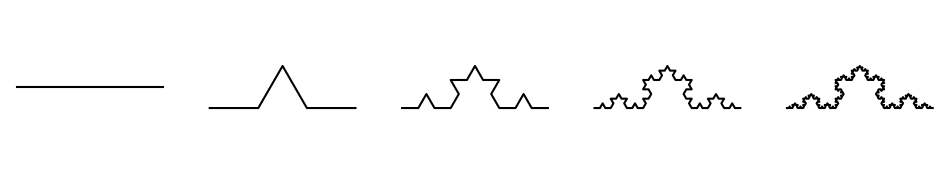

In [4]:
def koch_curve(points, n):
    """
    Generuje punkty krzywej Kocha.
    
    Args:
    - points (list): lista punktów startowych.
    - n (int): liczba iteracji.
    
    Returns:
    - list: punkty krzywej Kocha po n iteracjach.
    """
    if n == 0:
        return points
    else:
        new_points = []
        for i in range(len(points) - 1):
            p1 = points[i]
            p2 = points[i+1]
            
            # Oblicz punkty podziału
            delta_x = p2[0] - p1[0]
            delta_y = p2[1] - p1[1]

            pA = (2*p1[0] + p2[0]) / 3, (2*p1[1] + p2[1]) / 3
            pB = (p1[0] + 2*p2[0]) / 3, (p1[1] + 2*p2[1]) / 3
            pC = (p1[0] + 0.5*delta_x - (np.sqrt(3)/6)*delta_y, p1[1] + 0.5*delta_y + (np.sqrt(3)/6)*delta_x)

            new_points.extend([p1, pA, pC, pB])
        new_points.append(points[-1])
        return koch_curve(new_points, n-1)


def draw_koch_curve(n):
    fig, axs = plt.subplots(1, n, figsize=(12, 2))
    for i, ax in enumerate(axs):
        points = [(0, 0), (1, 0)]
        koch_points = koch_curve(points, i)
        x, y = zip(*koch_points)
        ax.plot(x, y, 'black')
        ax.axis('equal')
        ax.axis('off')


draw_koch_curve(5)

# Fraktale samoafiniczne

## Paprotka Barnsleya

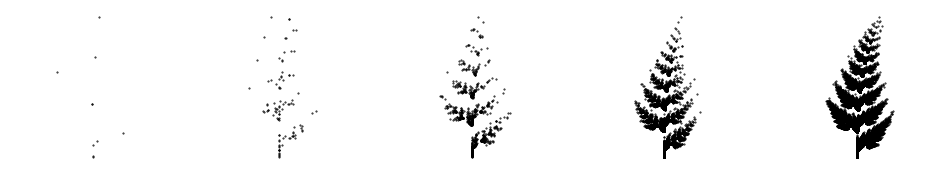

In [5]:
def barnsley_fern(points):
    p1 = max(np.linalg.eig([[0,0],[0,0.16]])[0]**(0.5))
    p2 = max(np.linalg.eig([[0.85,0.04],[-0.04,0.85]])[0]**(0.5))
    p3 = max(abs(np.linalg.eig([[0.2,-0.26],[-0.23, 0.22]])[0])**(0.5))
    p4 = max(abs(np.linalg.eig([[-0.15,0.28],[0.26, 0.24]])[0])**(0.5))

    pp1 = p1/(p1+p2+p3+p4)
    pp2 = (p1 + p2)/(p1+p2+p3+p4)
    pp3 = (p1 + p2 + p3)/(p1+p2+p3+p4)
    pp4 = (p1 + p2 + p3 + p4)/(p1+p2+p3+p4)
    
    
    def f1(x, y):
        return (0., 0.16*y)

    def f2(x, y):
        return (0.85*x + 0.04*y, -0.04*x + 0.85*y + 1.6)

    def f3(x, y):
        return (0.2*x - 0.26*y, 0.23*x + 0.22*y + 1.6)

    def f4(x, y):
        return (-0.15*x + 0.28*y, 0.26*x + 0.24*y + 0.44)

    x, y = 0, 0
    x_list = []
    y_list = []
    
    for _ in range(points):
        p = random.random()

        if p < pp1:
            func = f1
        elif p < pp2:
            func = f2
        elif p < pp3:
            func = f3
        else:
            func = f4
            
        x, y = func(x, y)
        x_list.append(x)
        y_list.append(y)
        
    return [x_list, y_list]

def draw_barnsley_fern(n):
    fig, axs = plt.subplots(1, n, figsize=(12, 2))
    for i, ax in enumerate(axs):
        points = (10 ** i) * 10
        x_list, y_list = barnsley_fern(points)
        ax.scatter(x_list, y_list, s=0.2, color='black')
        ax.axis('equal')
        ax.axis('off')


draw_barnsley_fern(5)

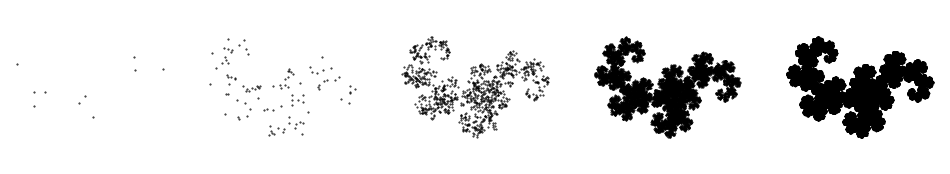

In [6]:
def dragon(points):
    p1 = max(np.linalg.eig([[0.5,0.5],[-0.5,0.5]])[0]**(0.5))
    p2 = max(np.linalg.eig([[-0.5,0.5],[-0.5,-0.5]])[0]**(0.5))

    pp1 = p1/(p1+p2)
    
    def f1(x, y):
        return (0.5*x + 0.5*y - 0.27, -0.5*x + 0.5*y)

    def f2(x, y):
        return (-0.5*x + 0.5*y + 0.14, -0.5*x - 0.5*y)

    
    x, y = 0, 0
    x_list = []
    y_list = []

    for _ in range(points):
        p = random.random()

        if p < pp1:
            func = f1
        else:
            func = f2
            
        x, y = func(x, y)
        x_list.append(x)
        y_list.append(y)
        
    return [x_list, y_list]

def draw_dragon(n):
    fig, axs = plt.subplots(1, n, figsize=(12, 2))
    for i, ax in enumerate(axs):
        points = (10 ** i) * 10
        x_list, y_list = dragon(points)
        ax.scatter(x_list, y_list, s=0.2, color='black')
        ax.axis('equal')
        ax.axis('off')


draw_dragon(5)

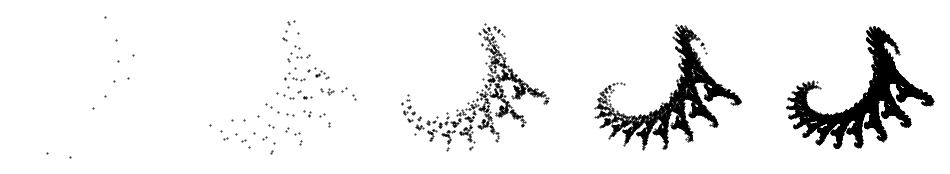

In [7]:
def dragon_v2(points):
    p1 = max(np.linalg.eig([[0.824,0.281],[-0.212,0.86]])[0]**(0.5))
    p2 = max(np.linalg.eig([[0.088,0.521],[-0.463,- 0.377]])[0]**(0.5))

    pp1 = p1/(p1+p2)
    
    def f1(x, y):
        return (0.824*x + 0.281*y - 1.88, -0.212*x + 0.86*y - 0.11)

    def f2(x, y):
        return (0.088*x + 0.521*y + 0.78, -0.463*x - 0.377*y + 8.09)

    
    x, y = 0, 0
    x_list = []
    y_list = []

    for _ in range(points):
        p = random.random()

        if p < pp1:
            func = f1
        else:
            func = f2
            
        x, y = func(x, y)
        x_list.append(x)
        y_list.append(y)
        
    return [x_list, y_list]

def draw_dragon(n):
    fig, axs = plt.subplots(1, n, figsize=(12, 2))
    for i, ax in enumerate(axs):
        points = (10 ** i) * 10
        x_list, y_list = dragon_v2(points)
        ax.scatter(x_list, y_list, s=0.2, color='black')
        ax.axis('equal')
        ax.axis('off')


draw_dragon(5)

## Box counting

In [32]:
def plot_reg(logs, logN, slope, intercept, **kwargs):
    fractal = kwargs['fractal'] if 'fractal' in kwargs.keys() else ''
        
    # Rysowanie punktów
    plt.scatter(logs, logN, color='blue', label='Punkty danych')
    
    # Rysowanie linii regresji
    plt.plot(logs, slope * logs + intercept, color='red', label=f'Regresja: y = {slope:.2f}x + {intercept:.2f}')
    plt.xlabel('log(epsilons)')
    plt.ylabel('log(N)')
    plt.legend()
    plt.title(f'Regresja liniowa dla wymiaru boxowego ({fractal})')
    plt.show()


def compute_box_dimension(X, epsilons, **kwargs):
    counts = []
    eps = []

    for epsilon in epsilons:
        # Zlicz liczbę boxów potrzebnych do pokrycia przestrzeni
        count = 0
        for i in range(0, len(X), int(epsilon * len(X))):  # Przechodzimy przez podzbiory
            subset = X[i:i + int(epsilon * len(X))]
            if len(subset) > 0:
                diff = np.ptp(subset, axis=0)  # Rozpiętość (min-max)
                count += np.prod(np.ceil(diff / epsilon))  # Liczba boxów w tym przedziale
        if count > 0:
            counts.append(count)
            eps.append(epsilon)

    logs = np.log(1/np.array(eps))
    logN = np.log(counts)

    slope, intercept, _, _, _ = linregress(logs, logN)
    
    plot_reg(logs, logN, slope, intercept, **kwargs)
    
    return slope

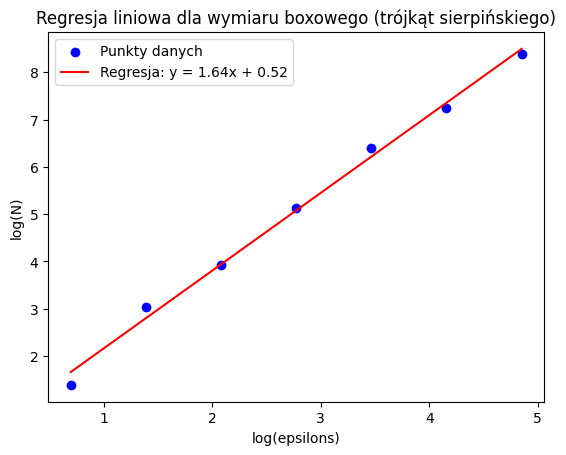

Wymiar boxowy dla trójkąta Sierpińskiego: 1.6437166526111615


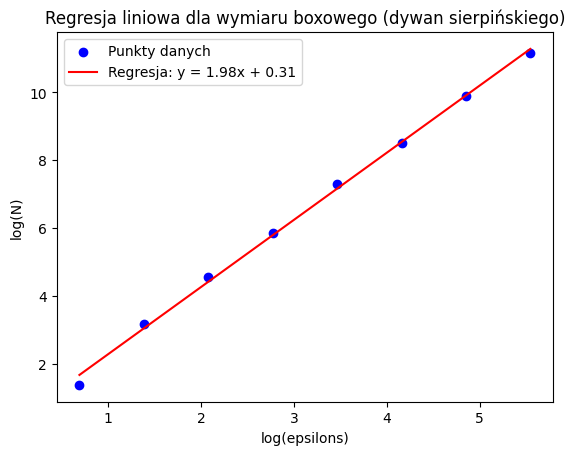

Wymiar boxowy dla dywanu Sierpińskiego: 1.9777495541185959


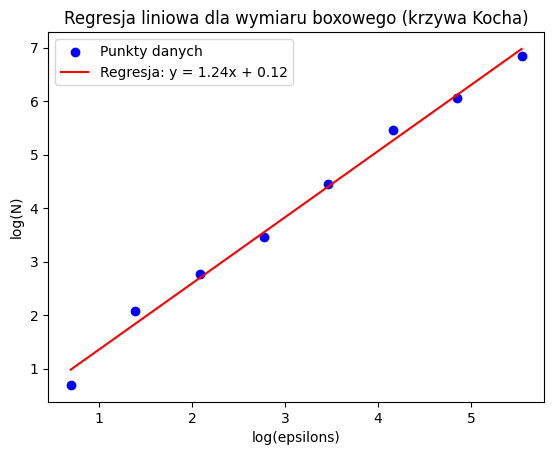

Wymiar boxowy dla krzywej Kocha: 1.236213440466219


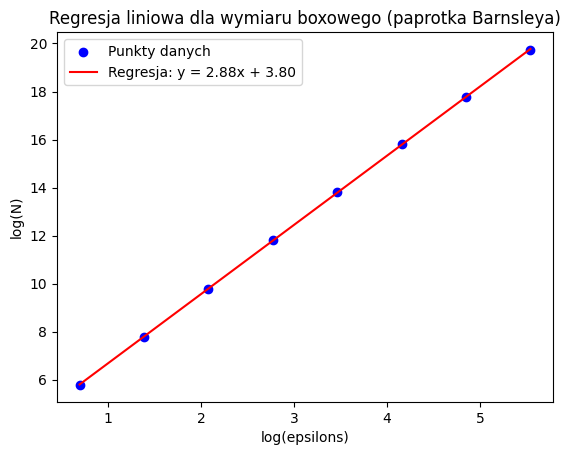

Wymiar boxowy dla paproci Barnsleya: 2.879996784685529


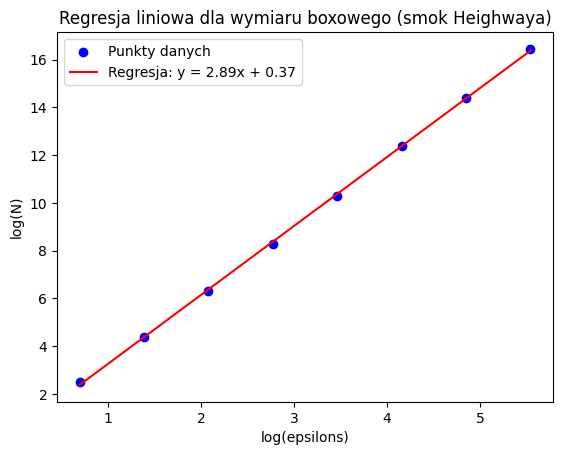

Wymiar boxowy dla smoka Heighwaya: 2.8872694174175386


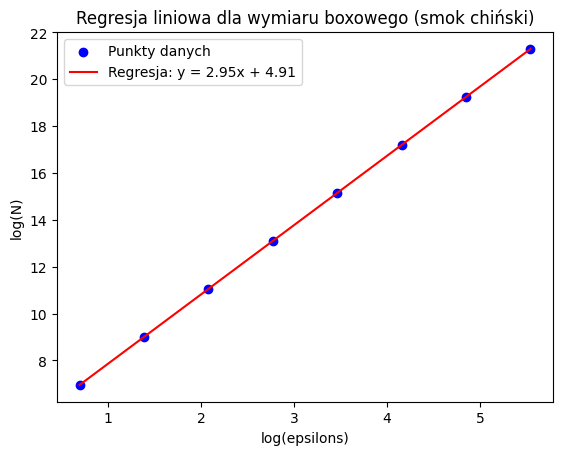

Wymiar boxowy dla smoka chińskiego: 2.954345679299728


In [9]:
# Epsilony dla testów
epsilons = [1 / (2 ** i) for i in range(1, 9)]

# Trójkąt Sierpińskiego
triangles = sierpinski_triangle([(0, 0), (1, 0), (0.5, np.sqrt(3)/2)], 5)
X_triangle = [point for triangle in triangles for point in triangle]
X_triangle = np.unique(X_triangle, axis=0)
print("Wymiar boxowy dla trójkąta Sierpińskiego:", compute_box_dimension(X_triangle, epsilons, fractal='trójkąt sierpińskiego'))

# Dywan Sierpińskiego
rectangles = sierpinski_carpet([(0, 0), (1, 0), (1, 1), (0, 1)], 4)
X_carpet = [point for rect in rectangles for point in rect]
X_carpet = np.unique(X_carpet, axis=0)
print("Wymiar boxowy dla dywanu Sierpińskiego:", compute_box_dimension(X_carpet, epsilons, fractal='dywan sierpińskiego'))

# Krzywa Kocha
koch_points = koch_curve([(0, 0), (1, 0)], 5)
X_koch = np.array(koch_points)
print("Wymiar boxowy dla krzywej Kocha:", compute_box_dimension(X_koch, epsilons, fractal='krzywa Kocha'))

In [22]:
def barnsley_fern(points):
    def f1(x, y):
        return (0., 0.16 * y)

    def f2(x, y):
        return (0.85 * x + 0.04 * y, -0.04 * x + 0.85 * y + 1.6)

    def f3(x, y):
        return (0.2 * x - 0.26 * y, 0.23 * x + 0.22 * y + 1.6)

    def f4(x, y):
        return (-0.15 * x + 0.28 * y, 0.26 * x + 0.24 * y + 0.44)

    probabilities = [0.01, 0.85, 0.07, 0.07]  # Prawdopodobieństwa wyboru transformacji
    funcs = [f1, f2, f3, f4]

    x, y = 0, 0
    x_list = []
    y_list = []

    for _ in range(points):
        func = random.choices(funcs, weights=probabilities, k=1)[0]
        x, y = func(x, y)
        x_list.append(x)
        y_list.append(y)

    # Skalowanie punktów do zakresu [-1, 1] x [0, 2.5]
    x_min, x_max = min(x_list), max(x_list)
    y_min, y_max = min(y_list), max(y_list)

    x_scaled = [(x - x_min) / (x_max - x_min) * 2 - 1 for x in x_list]
    y_scaled = [(y - y_min) / (y_max - y_min) * 2.5 for y in y_list]

    return [x_scaled, y_scaled]

def dragon(points):
    p1 = max(np.linalg.eig([[0.5, 0.5], [-0.5, 0.5]])[0]**(0.5))
    p2 = max(np.linalg.eig([[-0.5, 0.5], [-0.5, -0.5]])[0]**(0.5))

    pp1 = p1 / (p1 + p2)
    
    def f1(x, y):
        return (0.5 * x + 0.5 * y - 0.27, -0.5 * x + 0.5 * y)

    def f2(x, y):
        return (-0.5 * x + 0.5 * y + 0.14, -0.5 * x - 0.5 * y)

    x, y = 0, 0
    x_list = []
    y_list = []

    for _ in range(points):
        p = random.random()

        if p < pp1:
            func = f1
        else:
            func = f2
            
        x, y = func(x, y)
        x_list.append(x)
        y_list.append(y)

    # Skalowanie punktów do zakresu [-1, 1] x [-1, 1]
    x_min, x_max = min(x_list), max(x_list)
    y_min, y_max = min(y_list), max(y_list)

    x_scaled = [(x - x_min) / (x_max - x_min) * 2 - 1 for x in x_list]
    y_scaled = [(y - y_min) / (y_max - y_min) * 2 - 1 for y in y_list]

    return [x_scaled, y_scaled]


def dragon_v2(points):
    p1 = max(np.linalg.eig([[0.824, 0.281], [-0.212, 0.86]])[0]**(0.5))
    p2 = max(np.linalg.eig([[0.088, 0.521], [-0.463, -0.377]])[0]**(0.5))

    pp1 = p1 / (p1 + p2)
    
    def f1(x, y):
        return (0.824 * x + 0.281 * y - 1.88, -0.212 * x + 0.86 * y - 0.11)

    def f2(x, y):
        return (0.088 * x + 0.521 * y + 0.78, -0.463 * x - 0.377 * y + 8.09)

    x, y = 0, 0
    x_list = []
    y_list = []

    for _ in range(points):
        p = random.random()

        if p < pp1:
            func = f1
        else:
            func = f2
            
        x, y = func(x, y)
        x_list.append(x)
        y_list.append(y)

    # Skalowanie punktów do zakresu [-1, 1] x [-1, 1]
    x_min, x_max = min(x_list), max(x_list)
    y_min, y_max = min(y_list), max(y_list)

    x_scaled = [(x - x_min) / (x_max - x_min) * 2 - 1 for x in x_list]
    y_scaled = [(y - y_min) / (y_max - y_min) * 2 - 1 for y in y_list]

    return [x_scaled, y_scaled]

def compute_box_dimension(points, epsilons, **kwargs):
    """
    Funkcja oblicza wymiar boxowy fraktalu na podstawie zestawu punktów (points).
    Działa poprzez pokrycie przestrzeni regularną siatką pudełek o rozmiarze epsilon 
    i zliczenie unikalnych pudełek zawierających punkty.

    :param points: Punkty reprezentujące fraktal (np. wynik generowania fraktalu)
    :param epsilons: Lista wartości epsilon (rozmiar pudełka)
    :param kwargs: Opcjonalne argumenty, np. 'fractal' (nazwa fraktalu)
    :return: Przybliżony wymiar boxowy (nachylenie regresji log-log)
    """
    counts = []
    points = np.array(points)  # Konwersja na numpy array, jeśli dane są w innym formacie
    
    for epsilon in epsilons:
        # Dzielimy przestrzeń na regularną siatkę o rozmiarze epsilon
        grid_coords = np.floor(points / epsilon)
        
        # Liczymy liczbę unikalnych pudełek (współrzędnych siatki) zawierających punkty
        unique_boxes = np.unique(grid_coords, axis=0)
        counts.append(len(unique_boxes))
    
    # Przygotowanie danych do regresji log-log
    logs = np.log(1 / np.array(epsilons))  # log(1/epsilon)
    logN = np.log(counts)                  # log(N(epsilon))
    
    # Wyznaczenie regresji liniowej (nachylenie to wymiar fraktala)
    slope, intercept, _, _, _ = linregress(logs, logN)
    
    # Rysowanie wykresu
    plot_reg(logs, logN, slope, intercept, **kwargs)
    
    return slope

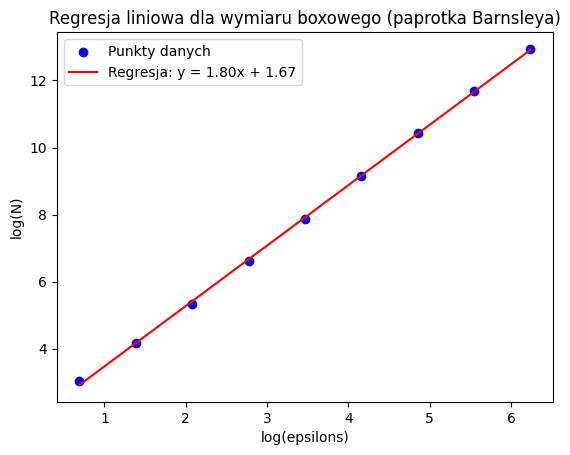

Wymiar boxowy dla paproci Barnsleya: 1.801782418255644


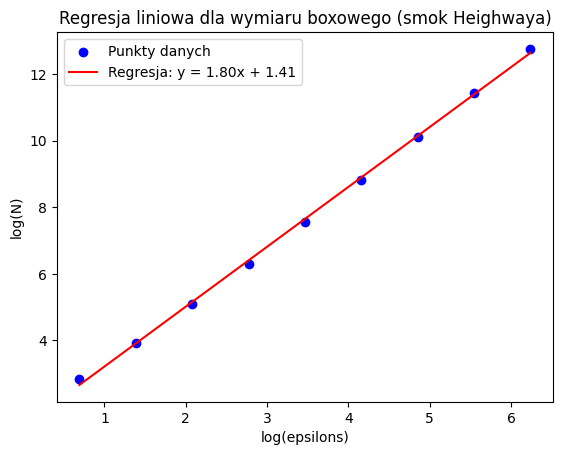

Wymiar boxowy dla smoka Heighwaya: 1.8002580892232702


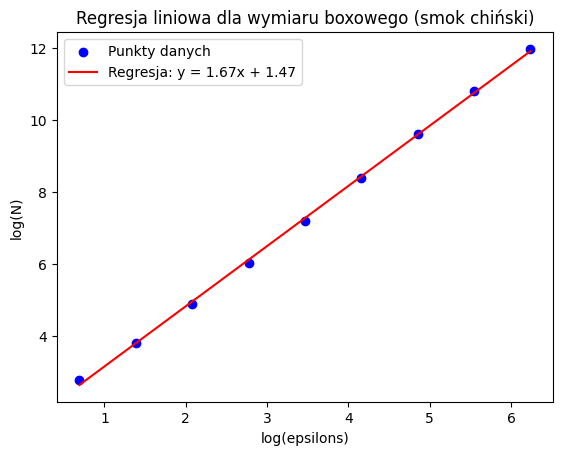

Wymiar boxowy dla smoka chińskiego: 1.673845294196158


In [28]:
# Paproć Barnsleya
fern_points = barnsley_fern(10000000)
X_fern = np.array(fern_points).T
print("Wymiar boxowy dla paproci Barnsleya:", compute_box_dimension(X_fern, epsilons, fractal='paprotka Barnsleya'))

# Smok
dragon_points = dragon(10000000)
X_dragon = np.array(dragon_points).T
print("Wymiar boxowy dla smoka Heighwaya:", compute_box_dimension(X_dragon, epsilons, fractal='smok Heighwaya'))

# Smok
dragon_points = dragon_v2(10000000)
X_dragon = np.array(dragon_points).T
print("Wymiar boxowy dla smoka chińskiego:", compute_box_dimension(X_dragon, epsilons, fractal='smok chiński'))

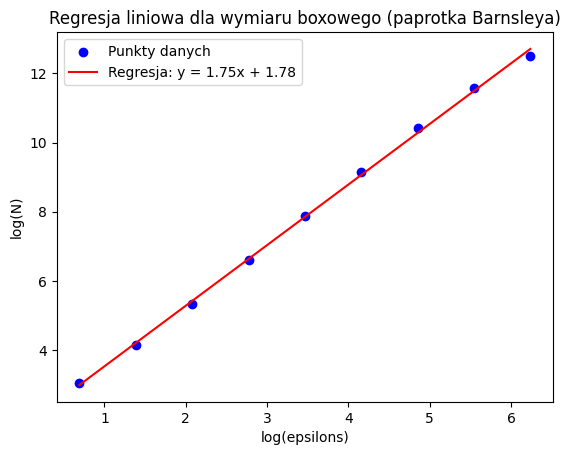

Wymiar boxowy dla paproci Barnsleya: 1.750906813655592


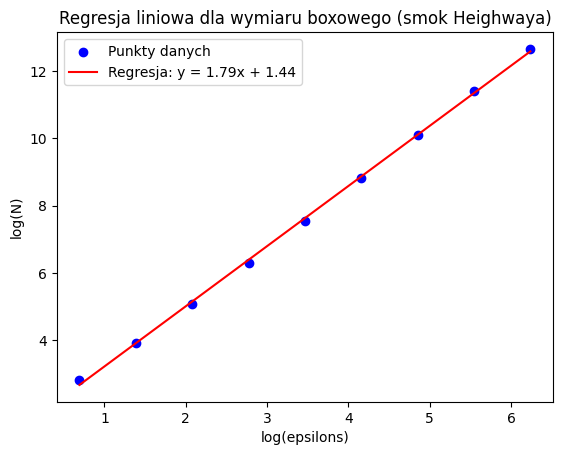

Wymiar boxowy dla smoka Heighwaya: 1.7866485928430584


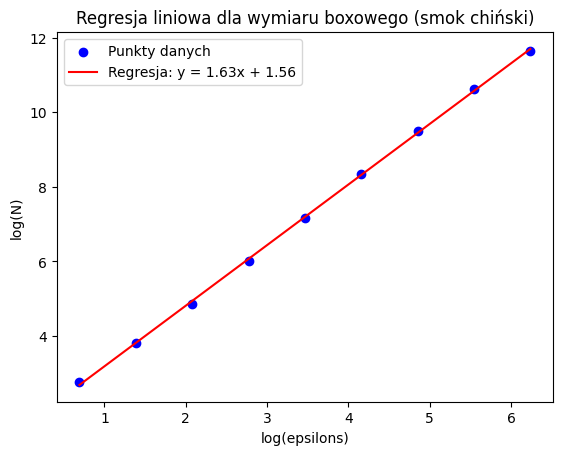

Wymiar boxowy dla smoka chińskiego: 1.625228781794333


In [29]:
# Paproć Barnsleya
fern_points = barnsley_fern(1000000)
X_fern = np.array(fern_points).T
print("Wymiar boxowy dla paproci Barnsleya:", compute_box_dimension(X_fern, epsilons, fractal='paprotka Barnsleya'))

# Smok
dragon_points = dragon(1000000)
X_dragon = np.array(dragon_points).T
print("Wymiar boxowy dla smoka Heighwaya:", compute_box_dimension(X_dragon, epsilons, fractal='smok Heighwaya'))

# Smok
dragon_points = dragon_v2(1000000)
X_dragon = np.array(dragon_points).T
print("Wymiar boxowy dla smoka chińskiego:", compute_box_dimension(X_dragon, epsilons, fractal='smok chiński'))

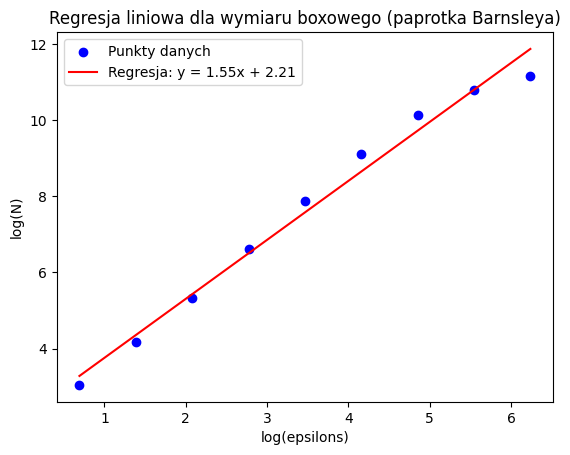

Wymiar boxowy dla paproci Barnsleya: 1.548592998999729


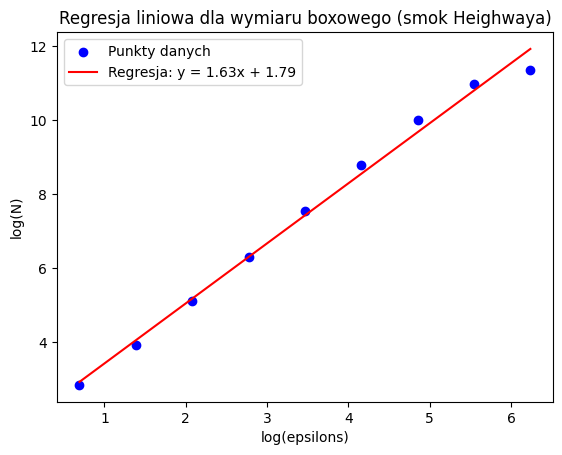

Wymiar boxowy dla smoka Heighwaya: 1.6263558998045937


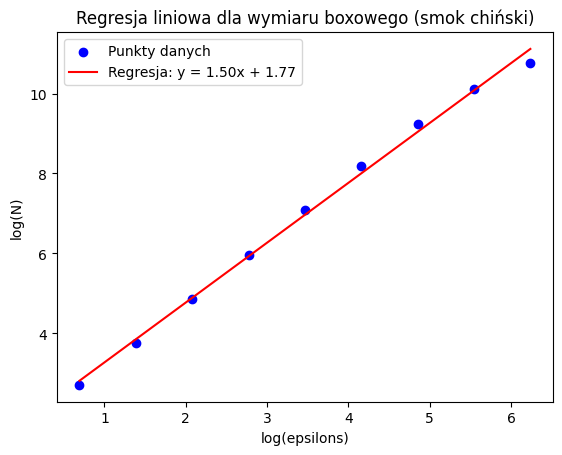

Wymiar boxowy dla smoka chińskiego: 1.4976835257957986


In [30]:
# Paproć Barnsleya
fern_points = barnsley_fern(100000)
X_fern = np.array(fern_points).T
print("Wymiar boxowy dla paproci Barnsleya:", compute_box_dimension(X_fern, epsilons, fractal='paprotka Barnsleya'))

# Smok
dragon_points = dragon(100000)
X_dragon = np.array(dragon_points).T
print("Wymiar boxowy dla smoka Heighwaya:", compute_box_dimension(X_dragon, epsilons, fractal='smok Heighwaya'))

# Smok
dragon_points = dragon_v2(100000)
X_dragon = np.array(dragon_points).T
print("Wymiar boxowy dla smoka chińskiego:", compute_box_dimension(X_dragon, epsilons, fractal='smok chiński'))